In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import datetime
import platform
from tensorflow.keras.layers import Convolution2D as conv
from tensorflow.keras.layers import MaxPooling2D as maxpool

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/digit-recognizer/train.csv')
test = pd.read_csv('/content/drive/MyDrive/digit-recognizer/test.csv')

In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = train.iloc[:, 1:] # 28 x 28 image
y = train.iloc[:, 0] # labels

In [25]:
X_test = test.iloc[:, :]
X_test.shape

(28000, 784)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(33600, 784)
(33600,)
(8400, 784)
(8400,)


In [26]:
X_train_re = X_train.to_numpy().reshape(33600, 28, 28)
y_train_re = y_train.values
X_val_re = X_val.to_numpy().reshape(8400, 28, 28)
y_val_re = y_val.values
X_test_re = X_test.to_numpy().reshape(28000, 28, 28)

In [27]:
print(X_train_re.shape)
print(y_train_re.shape)
print(X_val_re.shape)
print(y_val_re.shape)
print(X_test_re.shape)

(33600, 28, 28)
(33600,)
(8400, 28, 28)
(8400,)
(28000, 28, 28)


In [19]:
(_, img_width, img_height) = X_train_re.shape
img_channels = 1

In [20]:
print(img_width, img_height, img_channels)

28 28 1


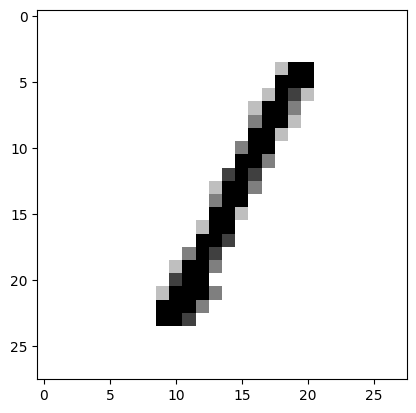

1


In [23]:
plt.imshow(X_train_re[0], cmap=plt.cm.binary)
plt.show()
print(y_train_re[0])

In [29]:
# in order to use conv layers
# reshape data to add color channels

x_train_with_channels = X_train_re.reshape(
    X_train_re.shape[0],
    img_width,
    img_height,
    img_channels
)

x_val_with_channels = X_val_re.reshape(
    X_val_re.shape[0],
    img_width,
    img_height,
    img_channels
)

x_test_with_channels = X_test_re.reshape(
    X_test_re.shape[0],
    img_width,
    img_height,
    img_channels
)

In [30]:
print(x_train_with_channels.shape, x_val_with_channels.shape, x_test_with_channels.shape)

(33600, 28, 28, 1) (8400, 28, 28, 1) (28000, 28, 28, 1)


In [31]:
# normalization

x_train_normalized = x_train_with_channels / 255
x_val_normalized = x_val_with_channels / 255
x_test_normalized = x_test_with_channels / 255

In [32]:
print(x_train_normalized[0][10])

[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.50196078]
 [1.        ]
 [1.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]


In [42]:
# building the cnn

model = tf.keras.models.Sequential()

model.add(conv(
    input_shape = (img_width, img_height, img_channels),
    kernel_size = 5,
    filters  = 8,
    strides = 1,
    activation = tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(maxpool(
    pool_size = (2,2),
    strides = (2,2)
))

model.add(conv(
    kernel_size = 5,
    filters  = 16,
    strides = 1,
    activation = tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(maxpool(
    pool_size = (2,2),
    strides = (2,2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 8)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [44]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [46]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train_re,
    epochs=10,
    validation_data=(x_val_normalized, y_val_re),
    callbacks=[tensorboard_callback]
)

print("The model has successfully trained")

Epoch 1/10
1050/1050 [==============================] - 15s 5ms/step - loss: 0.2883 - accuracy: 0.9097 - val_loss: 0.0894 - val_accuracy: 0.9730
Epoch 2/10
1050/1050 [==============================] - 6s 5ms/step - loss: 0.0876 - accuracy: 0.9737 - val_loss: 0.0661 - val_accuracy: 0.9811
Epoch 3/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0595 - accuracy: 0.9811 - val_loss: 0.0578 - val_accuracy: 0.9812
Epoch 4/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0497 - accuracy: 0.9836 - val_loss: 0.0480 - val_accuracy: 0.9855
Epoch 5/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0419 - accuracy: 0.9866 - val_loss: 0.0517 - val_accuracy: 0.9857
Epoch 6/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0350 - accuracy: 0.9887 - val_loss: 0.0482 - val_accuracy: 0.9879
Epoch 7/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0294 - accuracy: 0.9900 - val_loss: 0.0475 - val_accuracy

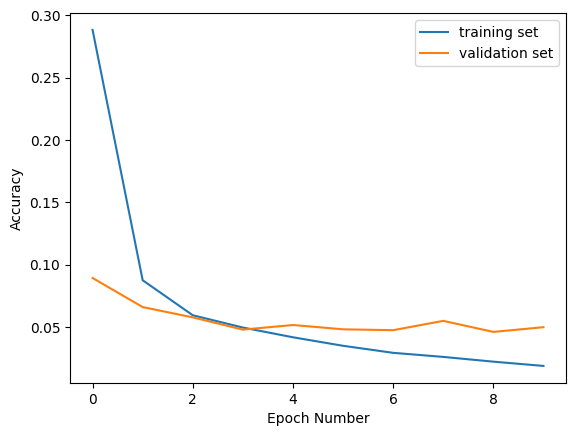

In [47]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='validation set')
plt.legend()

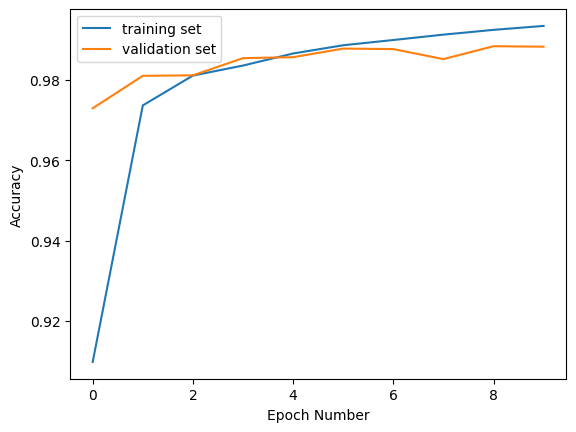

In [48]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='validation set')
plt.legend()

In [49]:
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train_re)

1050/1050 [==============================] - 3s 3ms/step - loss: 0.0080 - accuracy: 0.9970


In [50]:
print('Train loss: ', train_loss)
print('Train accuracy: ', train_accuracy)

Train loss:  0.008033660240471363
Train accuracy:  0.9969940185546875


In [52]:
validation_loss, validation_accuracy = model.evaluate(x_val_normalized, y_val_re)

263/263 [==============================] - 1s 2ms/step - loss: 0.0500 - accuracy: 0.9883


In [53]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.04996174946427345
Validation accuracy:  0.9883333444595337


In [54]:
# save the model

model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

In [55]:
loaded_model = tf.keras.models.load_model(model_name)

In [57]:
predictions_one_hot = loaded_model.predict([x_val_normalized])

263/263 [==============================] - 1s 3ms/step


In [58]:
# Each prediction consists of 10 probabilities (one for each number from 0 to 9).
# We need to pick the digit with the highest probability since this would be a digit that our model most confident with.

print('predictions_one_hot:', predictions_one_hot.shape)
pd.DataFrame(predictions_one_hot)

predictions_one_hot: (8400, 10)


,0,1,2,3,4,5,6,7,8,9
0,3.481593e-15,1.000000e+00,7.824010e-12,1.319327e-17,8.449460e-10,4.136781e-15,1.119332e-15,3.870127e-10,1.345587e-13,2.463995e-13
1,5.182725e-14,1.749881e-14,5.715895e-17,5.891728e-09,1.545147e-16,1.000000e+00,7.543435e-11,1.354499e-17,1.390186e-14,2.575085e-12
2,1.170506e-12,2.010296e-08,1.000000e+00,1.357945e-08,6.679895e-13,6.147795e-15,4.907300e-17,1.882898e-08,1.714595e-08,4.586445e-16
3,5.780225e-14,8.210579e-14,1.688359e-09,2.923049e-09,2.189078e-17,7.980033e-11,3.250722e-18,2.579390e-13,1.000000e+00,5.288507e-13
4,2.901553e-16,1.702216e-08,5.179489e-12,1.240945e-16,1.000000e+00,8.216282e-14,1.500848e-12,6.310138e-11,3.179755e-09,2.463666e-13
...,...,...,...,...,...,...,...,...,...,...
8395,2.493202e-12,1.000000e+00,1.235587e-11,4.209838e-14,2.589744e-08,7.819426e-13,2.020821e-13,5.881937e-09,3.802219e-11,9.278306e-10
8396,8.792067e-10,7.757942e-16,1.872663e-15,7.182595e-15,1.766967e-09,5.227054e-09,1.000000e+00,3.783299e-16,6.026822e-13,7.451133e-14
8397,2.754217e-13,2.696186e-12,7.192140e-10,1.498177e-08,2.066352e-14,1.138615e-10,1.256501e-18,5.355186e-13,1.000000e+00,1.202456e-08
8398,2.407163e-14,1.415093e-10,3.033936e-09,1.005332e-10,5.906072e-17,6.179645e-14,1.899685e-17,1.905234e-13,1.000000e+00,1.111317e-13


In [59]:
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,1
1,5
2,2
3,8
4,4
...,...
8395,1
8396,6
8397,8
8398,8


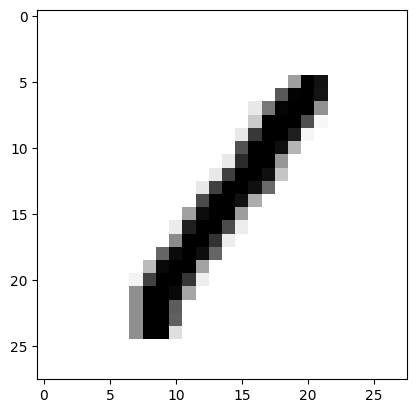

In [60]:
plt.imshow(x_val_normalized[0].reshape((28,28)), cmap=plt.cm.binary)
plt.show()

<ipython-input-62-d46c3cdd3c97>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_cells, num_cells, plot_index + 1)


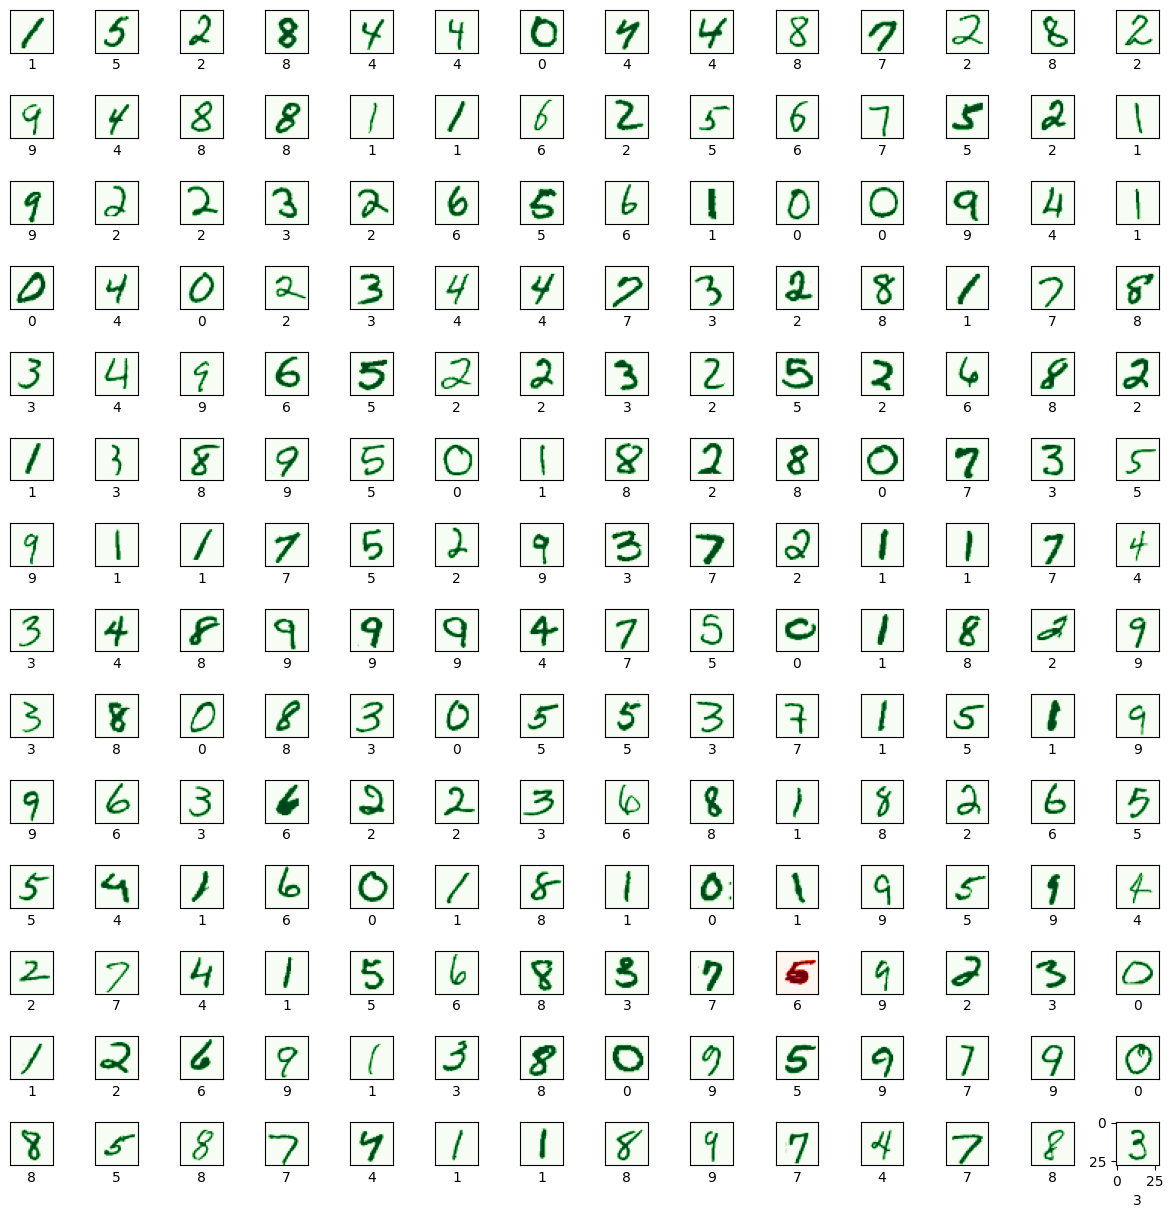

In [62]:
# correct predictions are displayed in 'green' color whereas wrong predictions are displayed in 'red'

numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_val_re[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_val_normalized[plot_index].reshape((28,28)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

In [63]:
predictions_one_hot = loaded_model.predict([x_test_normalized])
print('predictions_one_hot:', predictions_one_hot.shape)

875/875 [==============================] - 3s 3ms/step
predictions_one_hot: (28000, 10)


In [64]:
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,2
1,0
2,9
3,0
4,3
...,...
27995,9
27996,7
27997,3
27998,9


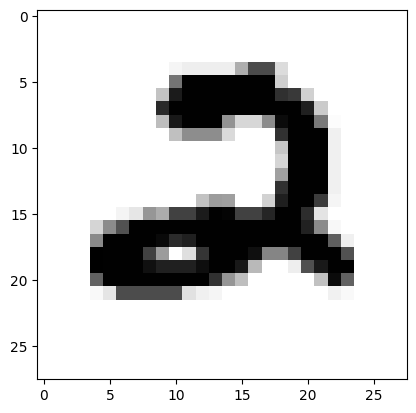

In [65]:
# the first prediction from our prediction set tells that the number is '2' lets find out

plt.imshow(x_test_normalized[0].reshape(28,28), cmap=plt.cm.binary)
plt.show()